    Snapshot ID Snapshot Date Checkin Date  Days  Original Price  \
0             1    2015-07-17   2015-08-12     5            1178   
1             1    2015-07-17   2015-08-19     5            1113   
2             1    2015-07-17   2015-08-13     5            4370   
3             1    2015-07-17   2015-07-26     5            1739   
4             1    2015-07-17   2015-08-12     5            1739   
5             1    2015-07-17   2015-08-07     5            1436   
6             1    2015-07-17   2015-08-09     5            1616   
7             1    2015-07-17   2015-08-12     5            1256   
8             1    2015-07-17   2015-08-13     5            1256   
9             1    2015-07-17   2015-07-22     5            1689   
10            1    2015-07-17   2015-07-30     5            2098   
11            1    2015-07-17   2015-07-31     5            2120   
12            1    2015-07-17   2015-07-26     5            1665   
13            1    2015-07-17   2015-08-02     5

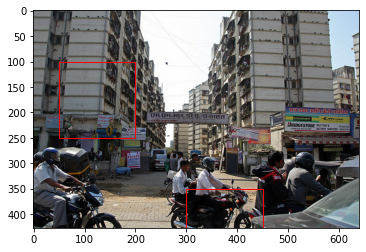

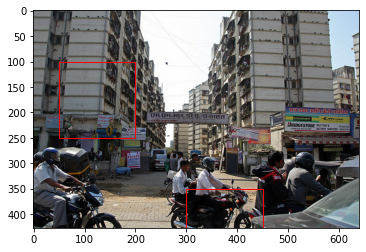

In [9]:
import numpy as np
import pandas as pd
import os
from datetime import datetime


class Placeholder:
    def __init__(self):
        raise NotImplementedError


if __name__ == '__main__':
    """
    1.
    1st part of the assignment
    """
    df = pd.read_csv("hotels_data.csv")

    copy_df = df.copy()

    copy_df['Snapshot Date'] = pd.to_datetime(copy_df['Snapshot Date'])
    copy_df['Checkin Date'] = pd.to_datetime(copy_df['Checkin Date'])
    copy_df['DayDiff'] = (copy_df['Checkin Date'] - copy_df['Snapshot Date']).dt.days

    copy_df['WeekDay'] = copy_df['Checkin Date'].dt.day_name()

    copy_df['DiscountDiff'] = copy_df['Original Price'] - copy_df['Discount Price']

    copy_df['DiscountPerc'] = (copy_df['DiscountDiff'] / copy_df['Original Price']) * 100

    my_df = pd.read_csv("Hotels_data_Changed.csv")
    
    print(my_df.head(15))
    

    """
    2.
    2nd part of the assignment
    """
    import json
    import csv
    from PIL import Image

    my_dict = {
        "image_name": "image1jpg.jpg",
        "annotations": [
            {
                "label": "animal",
                "coordinates": {
                    "x_min": 50,
                    "y_min": 100,
                    "x_max": 200,
                    "y_max": 250
                    }
                },
            {
                "label": "person",
                "coordinates": {
                    "x_min": 300,
                    "y_min": 350,
                    "x_max": 450,
                    "y_max": 500
                    }
                }
            ]
        }   
    
    def normalized_csv(json_file):
        
        with open(json_file_path, 'r') as json_file:
            original_data = json.load(json_file)
            
        image_path = original_data["image_name"]
        image = Image.open(image_path)
        image_width, image_height = image.size
    
        with open('norm_cor.csv', 'w', newline='') as csvfile:
            csv_obj = csv.writer(csvfile)
            csv_obj.writerow(['label', 'x_min', 'y_min', 'x_max', 'y_max'])
        
            for item in original_data['annotations']:
                label = item['label']
                x_min = item['coordinates']['x_min'] / image_width
                y_min = item['coordinates']['y_min'] / image_height
                x_max = item['coordinates']['x_max'] / image_width
                y_max = item['coordinates']['y_max'] / image_height
            
                csv_obj.writerow([label, x_min, y_min, x_max, y_max])
    
        return 
    
    json_file_path = "annotations.json"    
    with open(json_file_path, 'w') as json_file:
        json.dump(my_dict, json_file)        
            
    normalized_csv(json_file)

    my_norm = pd.read_csv('norm_cor.csv')
    print(my_norm)
    
    def convert_json(json_file):
        with open(json_file_path, 'r') as json_file:
            original_json = json.load(json_file)
        
        new_dict = {
            "image_name": original_json.get("image_name", ""),
            "annotations": []
        }

        for item in original_json['annotations']:
            label = item['label']
            x_min = item['coordinates']['x_min'] 
            y_min = item['coordinates']['y_min'] 
            x_max = item['coordinates']['x_max'] 
            y_max = item['coordinates']['y_max'] 

            width = x_max - x_min
            height = y_max - y_min

            new_annotation = {
                "label": label,
                "coordinates": {
                    "x_min": x_min,
                    "y_min": y_min,
                    "width": width,
                    "height": height
                }
            }
            new_dict["annotations"].append(new_annotation)

        with open(json_file_path, 'w') as new_json_file:
            json.dump(new_dict, new_json_file)

        return new_dict
    
    
    json_file_path = "annotations.json"
    with open(json_file_path, 'w') as json_file:
        json.dump(my_dict, json_file) 


    new_json = convert_json(json_file_path)
    print(new_json)

    
    """
    3.
    3rd part of the assignment
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    image_path = my_dict["image_name"]
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for index, row in my_norm.iterrows():
        x_min = row['x_min'] * image.width
        x_max = row['x_max'] * image.width
        y_min = row['y_min'] * image.height
        y_max = row['y_max'] * image.height

        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

    image_path = new_json["image_name"]
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for item in new_json['annotations']:
        x_min = item['coordinates']['x_min'] 
        y_min = item['coordinates']['y_min'] 
        width = item['coordinates']['width'] 
        height = item['coordinates']['height'] 

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()
